In [39]:
import numpy as np

ModuleNotFoundError: No module named 'numpy'

# 1. Quick-find
Checks the connection between two points

In [3]:
class quickfind:
    def __init__(self,L):
        self.ls=list(range(0, L))
    def connected(self,a,b):
        if self.ls[a]==self.ls[b]:
            print('already connected')
        else:
            print(False)
    def union(self,a,b):
        val1,val2=self.ls[a],self.ls[b]
        self.ls[a]=self.ls[b]
        for l in range(0,len(self.ls)):
            if self.ls[l]==val1:
                self.ls[l]=self.ls[b]
  

In [4]:
qf=quickfind(10)
qf.union(4,3)
qf.union(3,8)
qf.union(6,5)
qf.union(9,4)
qf.union(2,1)
qf.union(5,0)
qf.union(7,2)
print(qf.ls)
qf.union(6,1)

[0, 1, 1, 8, 8, 0, 0, 1, 8, 8]


<ul>
<li>Cost of the algorithm: Union is expensive (N^2)</li>
<li>Very slow</li>
</ul>

# 2. Quick-Union


In [5]:
class quickunion:
    def __init__(self,L):
        self.ls=list(range(0, L))
    
    def root(self,x):
        while x!=self.ls[x]:
            x=self.ls[x]
        return x
    def connected(self,a,b):
        if quickunion.root(self,a)==quickunion.root(self,b):
            print('already connected')
        else:
            print(False)
    def union(self,a,b):
        val1,val2=self.root(a),self.root(b)
        self.ls[val1]=val2


In [6]:
qu=quickunion(10)
qu.union(4,3)
qu.union(3,8)
qu.union(6,5)
qu.union(9,4)
qu.union(2,1)
qu.connected(8,9)
qu.connected(5,4)
qu.union(5,0)
qu.union(7,2)
qu.union(6,1)
print(qu.ls)

already connected
False
[1, 1, 1, 8, 3, 0, 5, 1, 8, 8]


Faster than Quick find but also slow generally

Improvements:


<ul>
<li>Weighting</li>
    can keep track the number of entities in a tree and then union them accordingly
</ul>

# 3. Weighted Quick-Union


In [9]:
class w_quickunion:
    def __init__(self,L):
        self.ls=list(range(0, L))
        self.sz=[1]*L
    
    def root(self,x):
        while x!=self.ls[x]:
            x=self.ls[x]
        return x
    def connected(self,a,b):
        if self.root(a)==self.root(b):
            print('Already connected')
        else:
            print("Not connected")
    def union(self,a,b):
        val1,val2=self.root(a),self.root(b)
        if val1==val2:
            return
        if self.sz[val1]<self.sz[val2]:
            self.ls[val1]=val2
            self.sz[val2]+=self.sz[val1]
        else:
            self.ls[val2]=val1
            self.sz[val1]+=self.sz[val2]

In [10]:
qu=w_quickunion(10)
print(qu.sz)
qu.union(4,3)
qu.union(3,8)
qu.union(6,5)
qu.union(9,4)
qu.union(2,1)
qu.connected(8,9)
qu.connected(5,4)
qu.union(5,0)
qu.union(7,2)
qu.union(6,1)
qu.union(7,3)

print(qu.ls)



[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Already connected
Not connected
[6, 2, 6, 4, 6, 6, 6, 2, 4, 4]


# 4. Weighted quick-unio with path compression

Flatning the tree

In [11]:
class w_quickunion:
    def __init__(self,L):
        self.ls=list(range(0, L))
        self.sz=[1]*L
    
    def root(self,x):
        while x!=self.ls[x]:
            self.ls[x]=self.ls[self.ls[x]]
            x=self.ls[x]
        return x
    def connected(self,a,b):
        if self.root(a)==self.root(b):
            print('Already connected')
        else:
            print("Not connected")
       
    def union(self,a,b):
        val1,val2=self.root(a),self.root(b)
        if val1==val2:
            return
        if self.sz[val1]<self.sz[val2]:
            self.ls[val1]=val2
            self.sz[val2]+=self.sz[val1]
        else:
            self.ls[val2]=val1
            self.sz[val1]+=self.sz[val2]

In [12]:
qu=w_quickunion(10)
print(qu.sz)
qu.union(4,3)
qu.union(3,8)
qu.union(6,5)
qu.union(9,4)
qu.union(2,1)
qu.connected(8,9)
qu.connected(5,4)
qu.union(5,0)
qu.union(7,2)
qu.union(6,1)
qu.union(7,3)

print(qu.ls)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Already connected
Not connected
[6, 2, 6, 4, 6, 6, 6, 6, 4, 4]


## Linked list

In [38]:
class node:
    def __init__(self,data=None):
        self.data=data
        self.next=None
    
class linked_list:
    def __init__(self):
        self.head=node()
    
    def append(self,data):
        new_node=node(data)
        current=self.head
        while current.next!=None:
            current=current.next
        current.next=new_node
    
    def length(self):
        count=0
        current=self.head
        while current.next!=None:
            count+=1
            current=current.next
        return count
    def display(self):
        lis=[]
        current=self.head
        while current.next!=None:
            current=current.next
            lis.append(current.data)
        return lis
    def get(self,index):
        if index>=self.length():
            print("Out of index")
            return None
        ind=0
        current=self.head
        while True:
            current=current.next
            if ind==index: return current.data
            ind+=1

    def set(self,d,index):
        if index>=self.length():
            print("Out of index")
            return None
        ind=0
        current=self.head
        while True:
            current=current.next
            if ind==index:
                current.data=d
                return
            ind+=1

    def erase(self,index):
        if index>=self.length():
            print("Out of index")
            return None
        ind=0
        current=self.head
        while True:
            last=current
            current=current.next
            if ind==index:
                last.next=current.next
                return
            ind+=1
            

In [42]:
ll=linked_list()
ll.display()
ll.append(5)
ll.append(6)
ll.append(7)
ll.append(8)
ll.append(9)
ll.append(10)
ll.length()
ll.get(5)
ll.display()
ll.erase(5)
ll.display()

[5, 6, 7, 8, 9]

# Stack using linked list

In [259]:
class node:
    def __init__(self,data=None,below=None):
        self.data=data
        self.below=below

class stack:
    def __init__(self):
        self.head=None
        self.size=0
        
    def push(self,data):
        new_node=node(data,self.head)
        self.head=new_node
        self.size+=1
        
    def is_empty(self):
        return self.size==0
    
    def pull(self):
        if self.is_empty()==True: return "Stack is empty"
        result=self.head.data
        self.head=self.head.below
        self.size-=1
        return result
    def peak(self):
        if self.is_empty()==True: return "Stack is empty"
        return self.head.data
    
    def length(self):
        return self.size

    def show(self):
        lis=[]
        if self.is_empty()==True: return []
        current=self.head
        while current!=None:
            lis.append(current.data)
            current=current.below  
        return lis
    
    ## Don't need it in stack
    def delete(self):
        if self.is_empty()==True: return []
        current=self.head
        current.data=None
        self.head=current.below



In [260]:
def main():
    st=stack()
    st.push(1)
    st.push(2)
    st.push(3)
    st.push(4)

    st.pull()

    print(st.show())
    st.delete()
    print(st.show())
      
if __name__ == "__main__":
    main()

[3, 2, 1]
[2, 1]


# Queue with linked lists

#### Application:
breath first search


In [97]:
class node:
    def __init__(self,data=None,below=None):
        self.data=data
        self.below=below
        
class queue:
    def __init__(self):
        self.head=None
        self.tail=None
        self.len=0
    
    def is_empty(self):
        return self.len==0
        
    def nqueuing(self,data):
        new=node(data,None)
        if self.is_empty():
            self.head=new
        else:
            self.tail.below=new   
        self.tail=new
        self.len+=1
    def dqueuing(self):
        if self.is_empty():
            return "Queue is empty"
        result=self.head.data
        self.head=self.head.below
        self.len-=1
        if self.is_empty():
            self.tail=None
        return result
        
    def peak(self):
        return self.head.data

10
6
Queue is empty


In [ ]:
def main():
    q=queue()
    q.nqueuing(10)
    q.nqueuing(20)
    q.nqueuing(4)
    q.nqueuing(5)
    q.nqueuing(6)
    q.nqueuing(7)
    print(q.dqueuing())
    q.dqueuing()
    q.dqueuing()
    q.dqueuing()
    print(q.dqueuing())
    q.dqueuing()
    q.dqueuing()
    q.dqueuing()
    print(q.dqueuing())
    
if __name__ == "__main__":
    main()

### Priority queue (heap)

Use heap to proritize the data
#### Note: no cycle included in heap tree

#### Application:
1. Dijkstra shortest path algorithm
2. best first search e.g. A*
3. Minimum panning tree

### Binary heap
* left child: 2i+1
* right child: 2i+2
* parent: (i-1)/2

### max heap

In [262]:
class heap:
    def __init__(self):
        self.lis=[]
        self.len=0
    def parent(self,index):
        return int((index-1)/2)
    
    def left_child(self,indices):
        return (2*indices)+1

    def right_child(self,indices):
        return (2*indices)+2
    
    def has_right_child(self,indices):
        return self.right_child(indices)<len(self.lis)
    
    def has_left_child(self,indices):
        return self.left_child(indices)<len(self.lis)
        
    def has_parent(self,indices):
        return self.parent(indices)>=0
    def swap(self,i,j):
        self.lis[i],self.lis[j]=self.lis[j],self.lis[i]

    def bubble_up(self,indices):
        while self.lis[self.parent(indices)]<self.lis[indices] and self.has_parent(indices):
            self.swap(self.parent(indices),indices)
            indices=self.parent(indices)
    def compare(self,l_ind,r_ind):
        
        if self.lis[l_ind]<=self.lis[r_ind]:
            return r_ind
        else:
            return l_ind
        

    def bubble_down(self,indices):
        greater=self.compare(self.left_child(indices),self.right_child(indices))
        while self.lis[greater]>self.lis[indices]:

            self.swap(indices,greater)
            indices=greater
            if self.left_child(indices)>len(self.lis) and self.left_child(indices)>len(self.lis):
                return
            
            greater=self.compare(self.left_child(indices),self.right_child(indices))
        
    
    def insert(self,data):
        self.lis.append(data)
        self.bubble_up(len(self.lis)-1)

    def pop(self):
        self.swap(0,len(self.lis)-1)
        result=self.lis.pop()
        self.bubble_down(0)
        return result
    
    def show(self):
        print(self.lis)
                   

In [ ]:
def main():
    xx=heap()
    xx.insert(99)
    xx.insert(45)
    xx.insert(63)
    xx.insert(35)
    xx.insert(29)
    xx.insert(57)
    xx.insert(42)
    xx.insert(27)
    xx.insert(12)
    xx.insert(24)
    # xx.show()
    xx.insert(50)
    # xx.show()
    xx.pop()
    xx.show()
      
if __name__ == "__main__":
    main()

### Binary seach tree



#### Remove Cases:
* case 1 Node to remove is leaf node
* case 2 Node to remove has right sub tree
* case 3 Node to remove has left sub tree
* case 4 Node to remove has right subtree and left subtree

In case four:
The successor can be the largest value in left sub-tree or the smallest value in right subtree which will satisfy the BST invariant.

In [11]:
class node:
    def __init__(self,data=None):
        self.data=data
        self.left_child=None
        self.right_child=None
        self.parent=None
        
class Bst:
    def __init__(self):
        self.head=None
        self.size=0
        self.pass_node=None

    def append(self,data):
        if self.size==0:
            self.size+=1
            self.head=node(data)
            return
        else:
            self.insert(data,self.head)
    
    def has_left_node(self,current_node):
        if current_node.left_child!=None:
            return True
        else:
            return False

    def has_right_node(self,current_node):
        if current_node.right_child!=None:
            return True
        else:
            return False

    def insert(self,data,current_node):
        if data>current_node.data:
            if current_node.right_child==None:
                current_node.right_child=node(data)
                current_node.right_child.parent=current_node
                self.size+=1
            else:
                self.insert(data,current_node.right_child)
                    
        elif data<current_node.data:
            if current_node.left_child==None:
                current_node.left_child=node(data)
                current_node.left_child.parent=current_node
                self.size+=1
            else:
                self.insert(data,current_node.left_child)
        else:
            print("already in tree")
        
    
    def find(self,data):
        if self.size==0:
            return
        else:
            self.ffind(data,self.head)
            print(self.pass_node)
            return self.pass_node
    
    def ffind(self,data,current_node):
        if current_node.data==data:
            self.pass_node=current_node
            return 
        elif data>current_node.data:
            if current_node.right_child==None:
                print("Not found")
                return
            self.ffind(data,current_node.right_child)
        elif data<current_node.data:
            if current_node.right_child==None:
                print("Not found")
                return
            self.ffind(data,current_node.left_child)
        else:
            return "Not Found"
    def find_max(self,current_node):
        while current_node!=None:
            if current_node.right_child!=None:
                current_node=current_node.right_child
            else:
                break
        return current_node

    
    # Three cases
    # 1. is leaf node
    # 2. has only right node
    # 3. has only left node
    # 4. has both node
    def swap(self,node1,node2):
        node1,node2=node2,node1

    def remove(self,value):
        node_to_remove=self.find(value)
        self.pass_node=None
        parent_node_rmv=node_to_remove.parent
        # case 1
        if self.has_left_node(node_to_remove)==False and self.has_right_node(node_to_remove)==False:
            print("Yes_1")
            if parent_node_rmv.data<value:
                parent_node_rmv.right_child=None
            elif parent_node_rmv.data>value:
                parent_node_rmv.left_child=None
        
        
        #case 2
        elif self.has_right_node(node_to_remove) and self.has_left_node(node_to_remove)==False:
            print("Yes_2")
            if parent_node_rmv.data<value:
                parent_node_rmv.right_child=node_to_remove.right_child
            elif parent_node_rmv.data>value:
                parent_node_rmv.left_child=node_to_remove.right_child
        
        #case 3
        elif self.has_left_node(node_to_remove) and self.has_right_node(node_to_remove)==False:
            print("Yes_3")
            if parent_node_rmv.data<value:
                parent_node_rmv.right_child=node_to_remove.left_child
            elif parent_node_rmv.data>value:
                parent_node_rmv.left_child=node_to_remove.left_child
        
        #case 4
        elif self.has_left_node(node_to_remove) and self.has_right_node(node_to_remove):
            #starting node
            current_node=self.find_max(node_to_remove.left_child)
            current_node.data,node_to_remove.data=node_to_remove.data,current_node.data
            current_node=None
        
        def bfs(self,data):
            qu.insert(self.head)
            while qu.is_it_empty!=True:
                current_node=qu.pop()
                if self.current_node.has_left_node():
                    qu.insert(self.current_node.left_child)
                elif self.current_node.has_left_node():
                    qu.insert(self.current_node.left_child)
                print(current_node.data)


In [12]:
def main():
    bst=Bst()
    
    ## case 1 2 and 3 (Test)
#     bst.append(10)
#     bst.append(5) 
#     bst.append(15) 
#     bst.append(30)
#     bst.append(4) 
#     bst.append(9) 
#     bst.append(14)
#     bst.find(30)
#     bst.remove(30)
#     bst.find(15)
#     bst.remove(15)
#     bst.find(15)
    
    ## ## case 4 (Test)
    bst.append(10)
    bst.append(5) 
    bst.append(15) 
    bst.append(30)
    bst.append(4) 
    bst.append(9) 
    bst.append(14)
    bst.remove(10)
    bst.find(10)
    
      
if __name__ == "__main__":
    main()

Not found
None


# Tree traversals

* Preorder: print before recursive call
* Inorder: print between recursive call
* Postorder: print after recursive call
* Level Order traversals

#### Preorder
```python
def Preorder(node):
    if node==None: return
    print(node.value)
    Preorder(node.left)
    Preorder(node.right)
```

#### Inorder
```python
def Inorder(node):
    if node==None: return
    Inorder(node.left)
    print(node.value)
    Inorder(node.right)
```

#### Postorder
```python
def postorder(node):
    if node==None: return
    postorder(node.left)
    postorder(node.right)
    print(node.value)
```


## Level order (Breath first search)


In [4]:
class Q_node:
    def __init__(self,data=None,next=None):
        self.q_data=data
        self.next=next

class BST_node:
    def __init__(self,data=None):
        self.bfs_data=data
        self.left_child=None
        self.right_child=None
        self.parent=None  

class Bst:
    def __init__(self):
        self.q_head=None
        self.q_tail=None
        self.bfs_head=None
        self.q_size=0
        self.bfs_size=0
        self.pass_node=None
    def q_is_it_empty(self):
        if self.q_size==0:
            return True
        else:
            return False
    def q_insert(self,data):
        new_node=Q_node(data,None)
        if self.q_is_it_empty():
            self.q_head=new_node
        else:
            self.q_tail.next=new_node
        self.q_tail=new_node
        self.q_size+=1
    def pop(self):
        if self.q_is_it_empty(): return "Queue is empty"
        current_node=self.q_head
        self.q_head=current_node.next
        self.q_size-=1
        return current_node 
    def show(self):
        current_node=self.q_head
        lis=[]
        while current_node!=None:
            lis.append(current_node.q_data)
            current_node=current_node.next
        print(lis)
    def peak(self):
        return self.q_head
    def has_left_node(self,current_node):
        if current_node.left_child!=None:
            return True
        else:
            return False
    def has_right_node(self,current_node):
        if current_node.right_child!=None:
            return True
        else:
            return False
    def append(self,data):
        if self.bfs_size==0:
            self.bfs_size+=1
            self.bfs_head=BST_node(data)
            return
        else:
            self.bfs_insert(data,self.bfs_head)
    def bfs_insert(self,data,current_node):
        if data>current_node.bfs_data:
            if current_node.right_child==None:
                current_node.right_child=BST_node(data)
                current_node.right_child.parent=current_node
                self.bfs_size+=1
            else:
                self.bfs_insert(data,current_node.right_child)          
        elif data<current_node.bfs_data:
            if current_node.left_child==None:
                current_node.left_child=BST_node(data)
                current_node.left_child.parent=current_node
                self.bfs_size+=1
            else:
                self.bfs_insert(data,current_node.left_child)
        else:
            print("already in tree")
    def find(self,data):
        if self.bfs_size==0:
            return
        else:
            self.search(data,self.bfs_head)
            return self.pass_node
    def search(self,data,current_node):
        if current_node.bfs_data==data:
            self.pass_node=current_node
            return 
        elif data>current_node.bfs_data:
            if current_node.right_child==None:
                print("Not found")
                return
            self.search(data,current_node.right_child)
        elif data<current_node.bfs_data:
            if current_node.right_child==None:
                print("Not found")
                return
            self.search(data,current_node.left_child)
        else:
            return "Not Found"
    def find_max(self,current_node):
        while current_node!=None:
            if current_node.right_child!=None:
                current_node=current_node.right_child
            else:
                break
        return current_node
    def swap(self,node1,node2):
        node1,node2=node2,node1
    def bfs(self):
        self.q_insert(self.bfs_head)
        temp=self.peak()
        open_it=temp.q_data
        print(open_it.bfs_data)
        while self.q_is_it_empty()!=True:
            if self.has_left_node(open_it):
                self.q_insert(open_it.left_child)
                print(open_it.left_child.bfs_data)
            if self.has_right_node(open_it):
                self.q_insert(open_it.right_child)
                print(open_it.right_child.bfs_data)
            self.pop()
            temp=self.peak()
            if temp!=None:
                open_it=temp.q_data


In [5]:
def main():
    bst=Bst()
### Creating graph
    bst.append(10)
    bst.append(5) 
    bst.append(15)
    bst.append(30)
    bst.append(4) 
    bst.append(9) 
    bst.append(14)
### breadth first search
    bst.bfs()


if __name__ == "__main__":
    print('point')
    main()

point
10
5
15
4
9
14
30


## Hash table (Closed addressing)

In [187]:
class hash_node:
    def __init__(self,data=None,next=None):
        self.hash_data=data
        self.hash_next=next

class hash:
    def __init__(self,length):
        self.length=length
        lis=self.create_list(self.length)
        self.used_node=0
    
    def create_list(self,length):
        self.lis=[None]*length
        return self.lis
    
    def hash_function(self,data):
        temp=0
        for val in data:
            temp+=ord(val)
        return temp%self.length
    def max_load_factor(self):
        return self.used_node/self.length
    
    def insert(self,data):
        
        h_f=self.hash_function(data)
        if self.lis[h_f]!=None:
            new_node=hash_node(data,None)
            current_node=self.lis[h_f]
            while current_node.hash_next!=None:
                current_node=current_node.hash_next
            current_node.hash_next=new_node
        
        elif self.lis[h_f]==None:
            self.head=hash_node(data)
            self.lis[h_f]=self.head
            self.used_node+=1

In [188]:
hh=hash(5)
lis=["arun","runta","tarun","ar unt"]

for val in lis:
    hh.insert(val)
print(hh.used_node)
print(hh.max_load_factor())

2
0.4


# Selection sort

[645, 843, 553, 87, 443, 475, 409, 950, 455, 801, 160, 276, 755, 599, 927, 707, 836, 134, 413, 937, 981, 509, 444, 144, 717, 533, 493, 405, 145, 658, 572, 229, 456, 368, 182, 421, 71, 606, 869, 861, 308, 324, 278, 767, 983, 960, 683, 469, 150, 674, 817, 979, 284, 400, 812, 344, 570, 307, 766, 183, 922, 667, 161, 435, 309, 642, 551, 167, 785, 686, 253, 216, 923, 622, 429, 600, 646, 517, 459, 673, 357, 352, 604, 118, 120, 366, 16, 778, 890, 389, 358, 939, 933, 156, 441, 59, 495, 854, 423, 908]


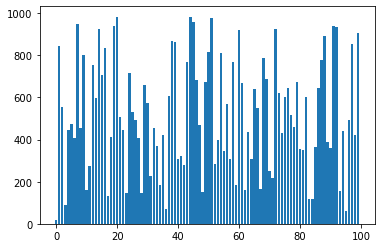

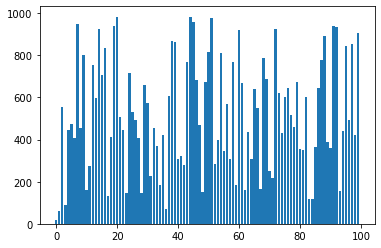

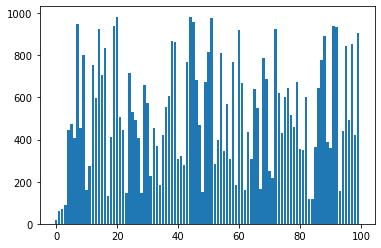

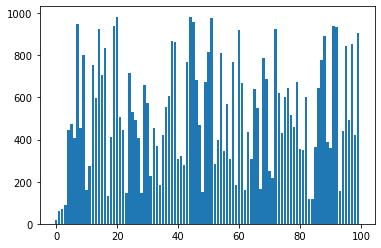

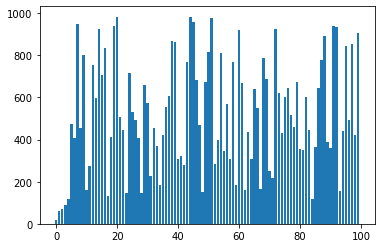

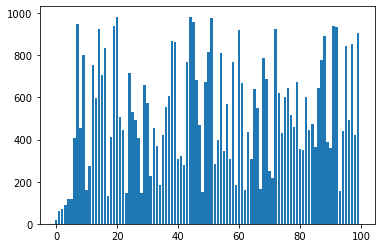

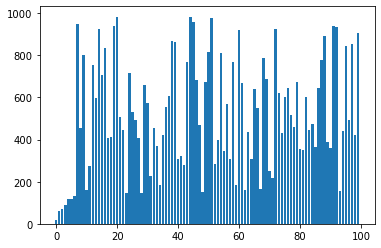

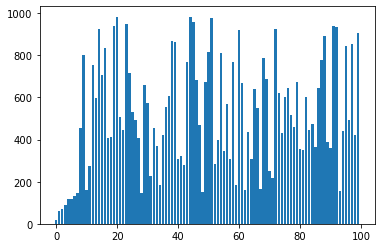

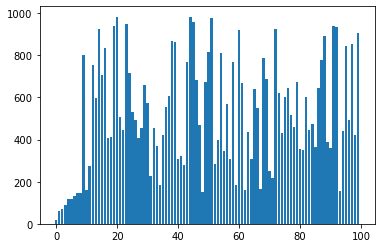

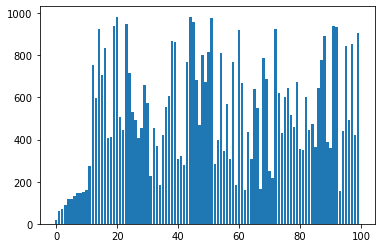

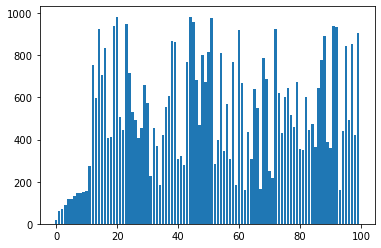

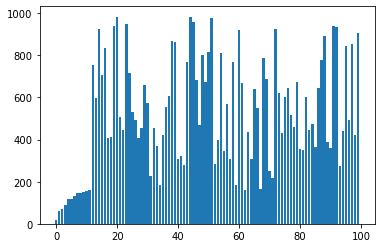

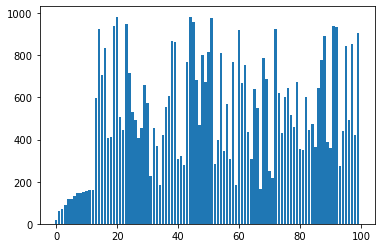

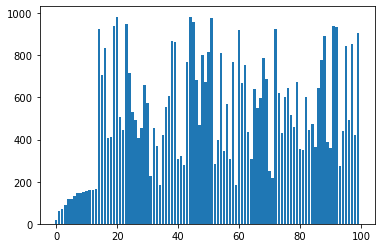

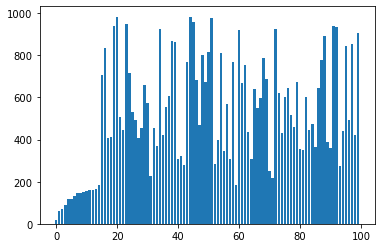

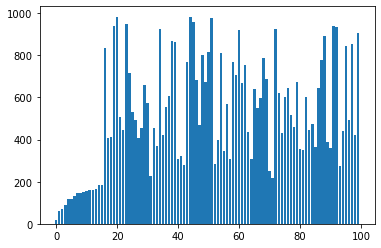

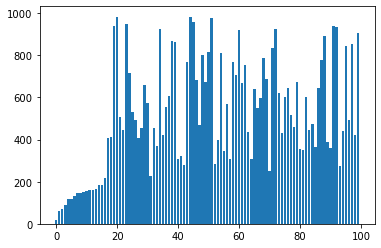

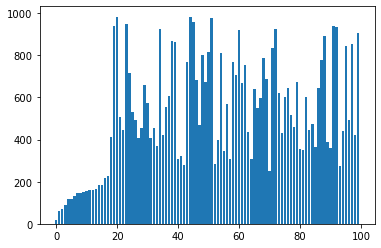

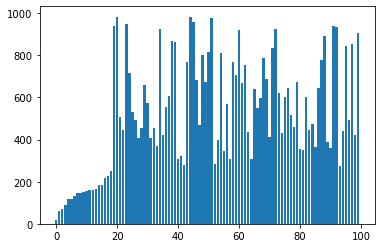

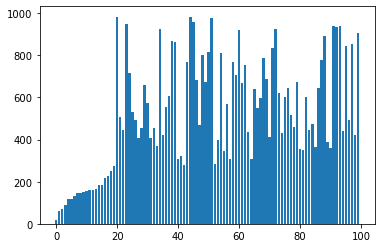

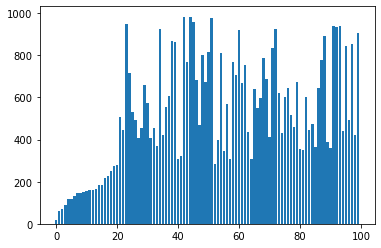

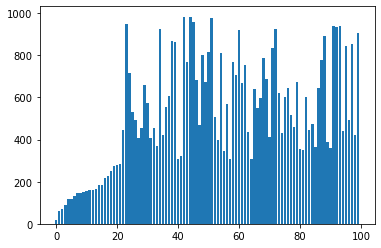

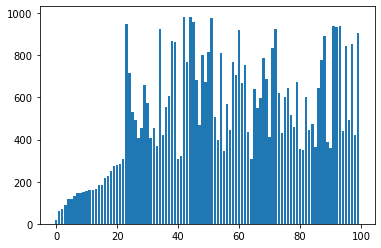

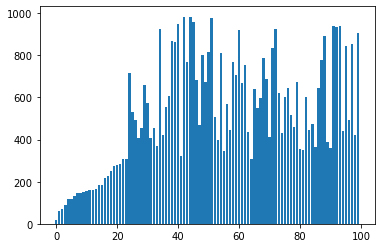

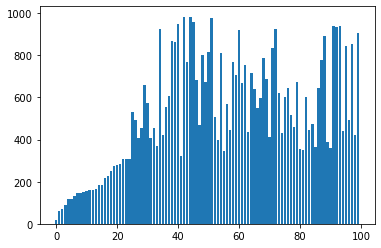

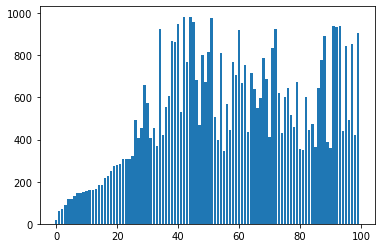

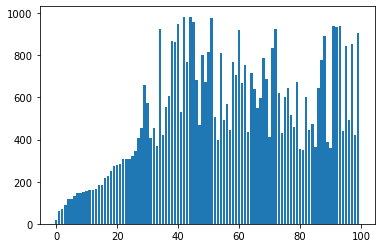

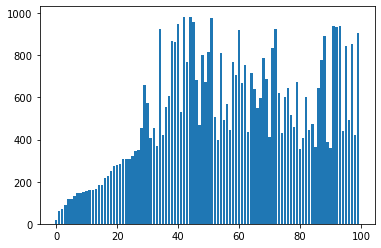

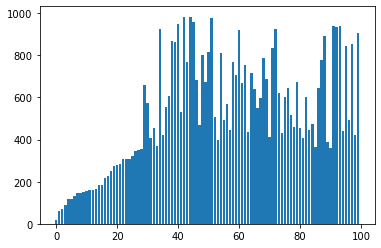

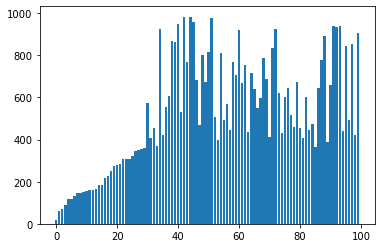

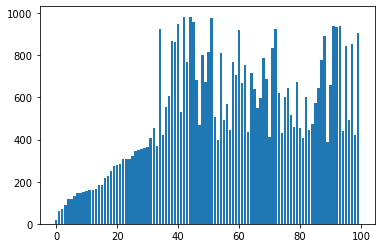

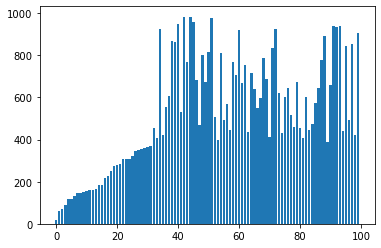

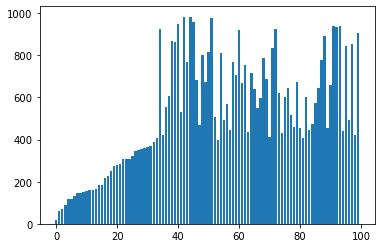

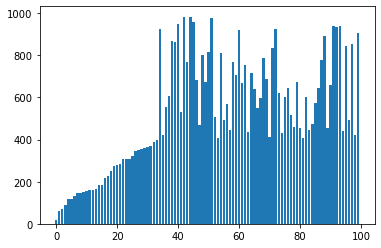

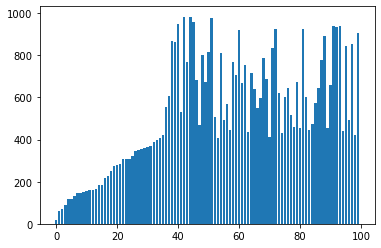

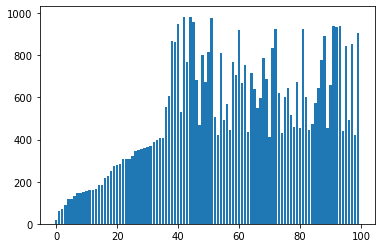

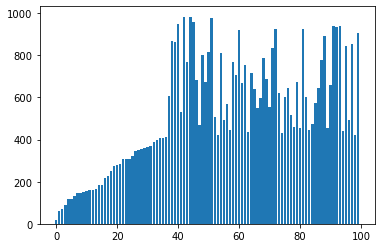

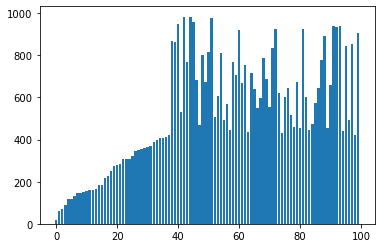

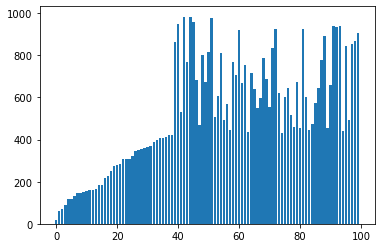

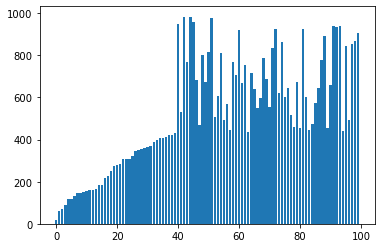

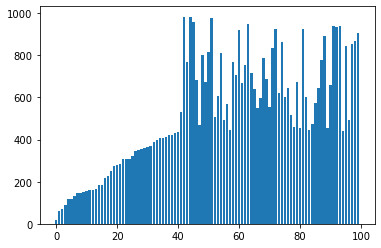

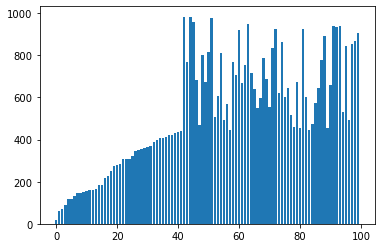

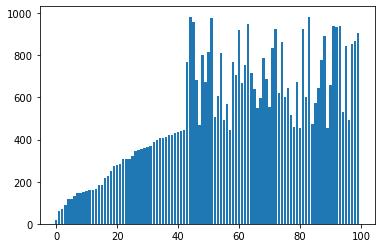

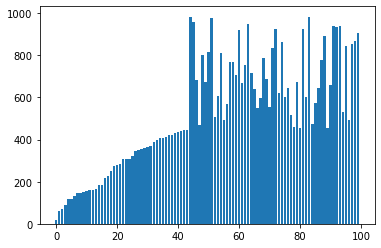

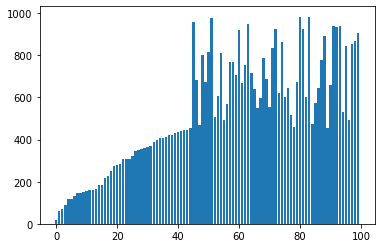

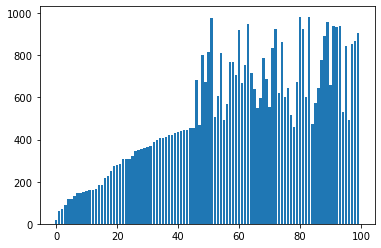

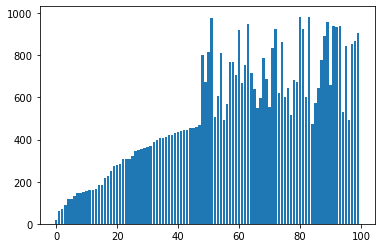

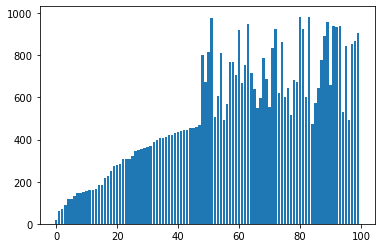

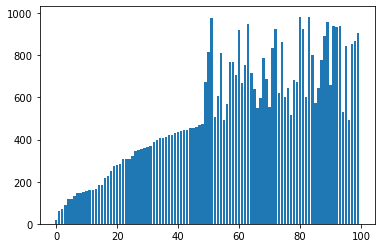

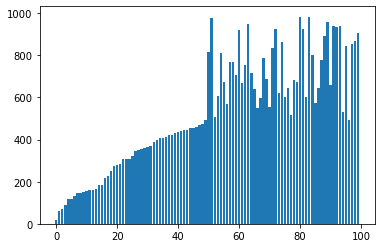

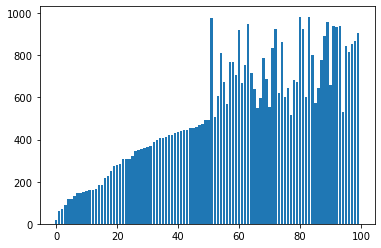

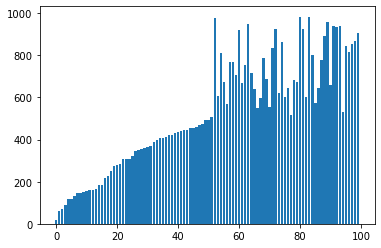

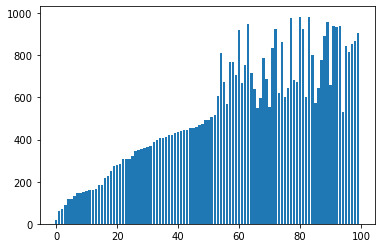

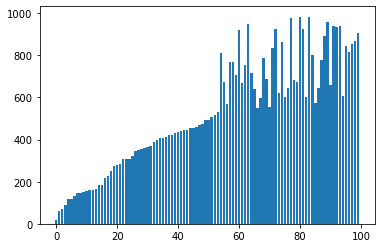

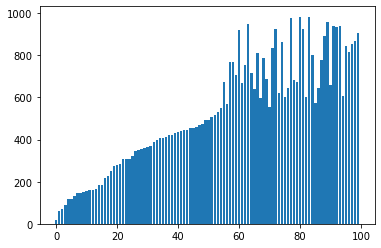

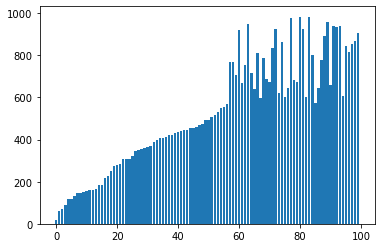

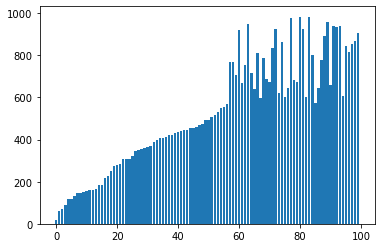

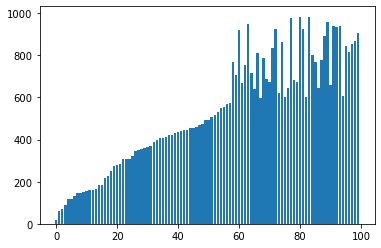

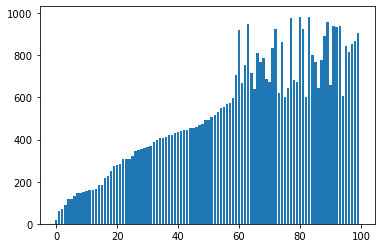

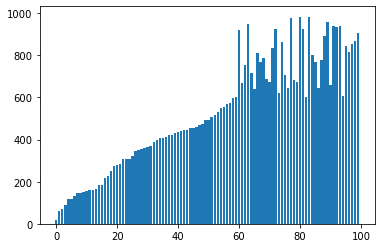

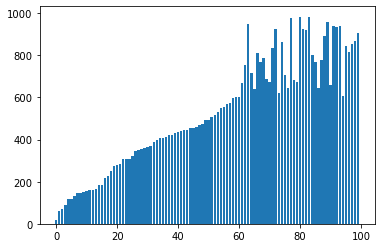

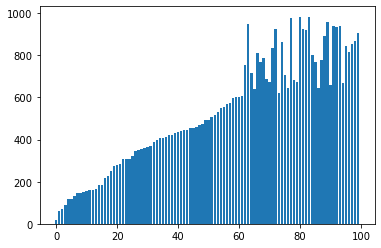

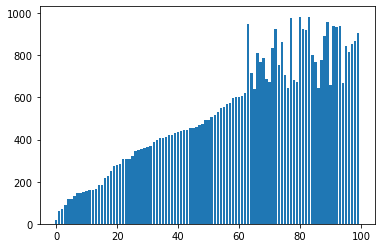

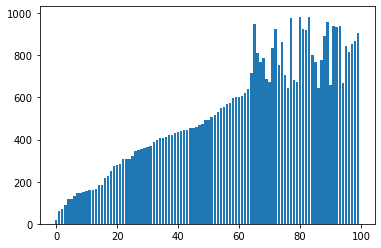

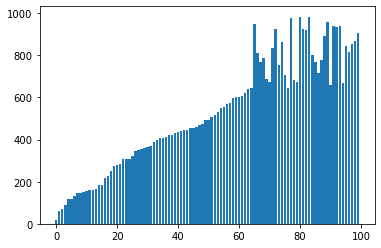

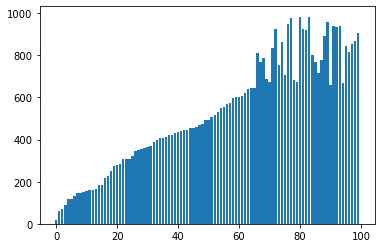

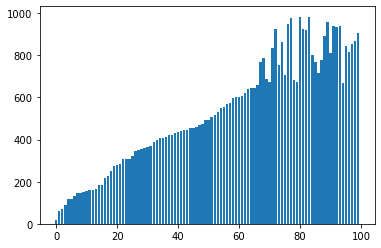

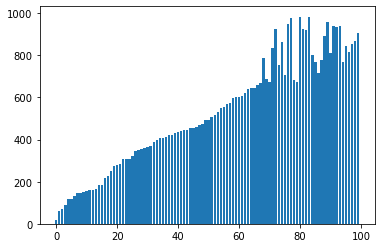

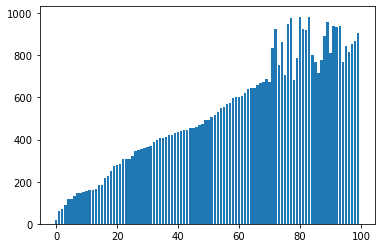

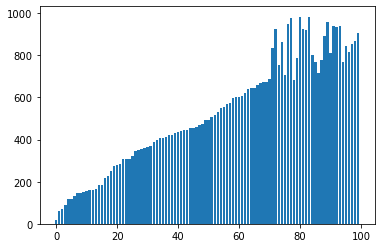

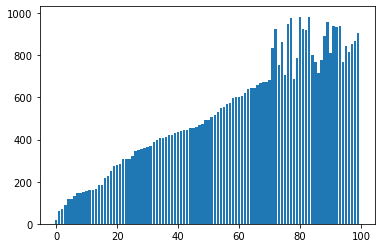

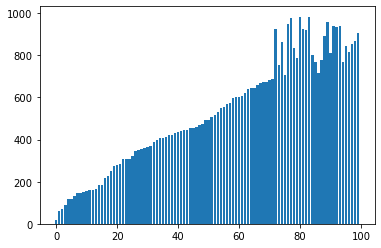

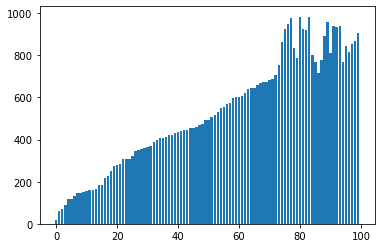

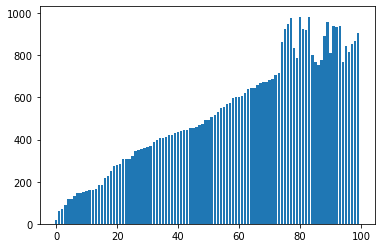

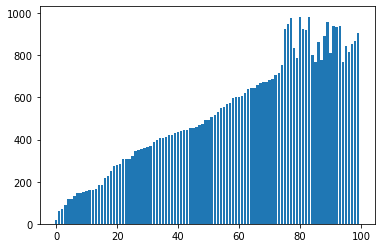

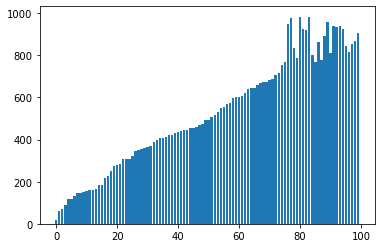

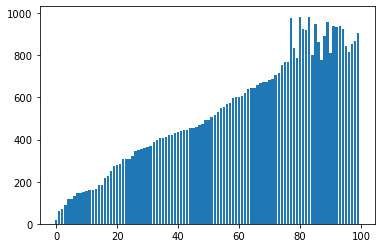

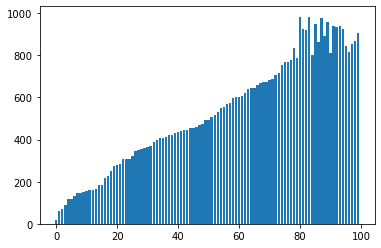

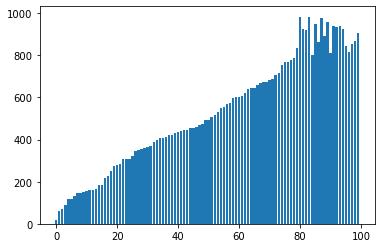

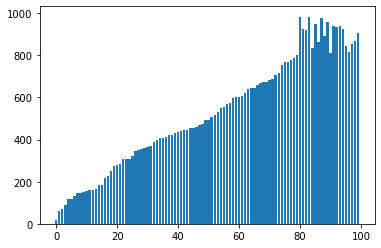

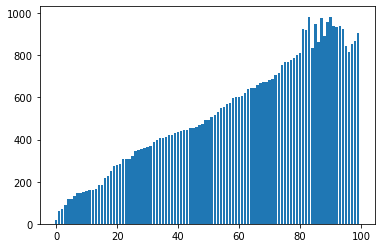

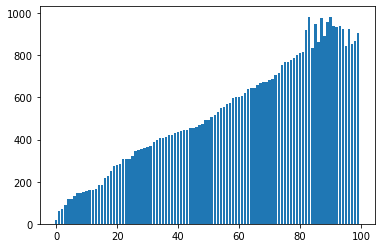

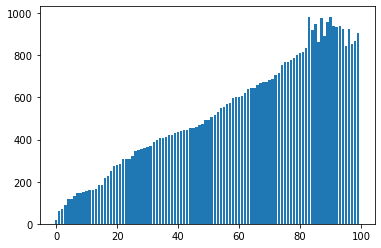

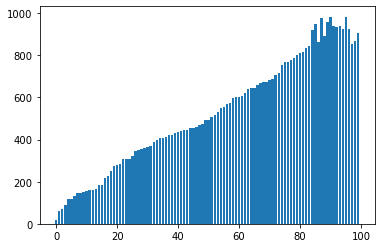

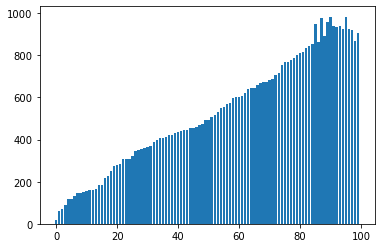

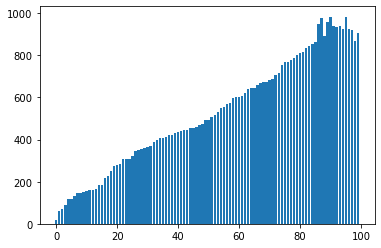

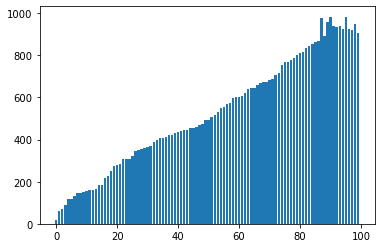

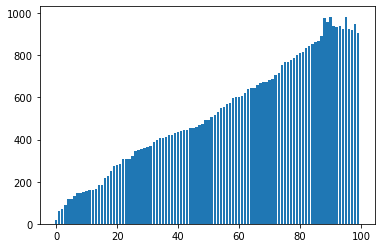

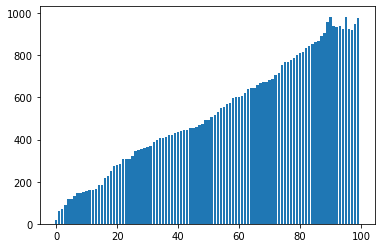

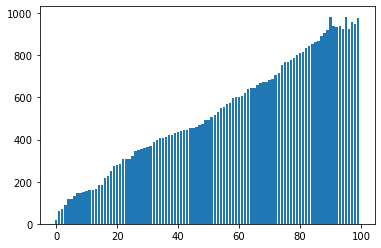

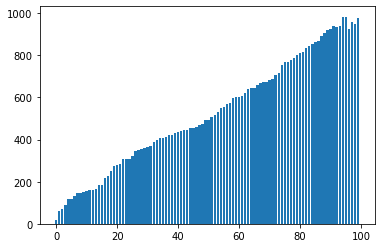

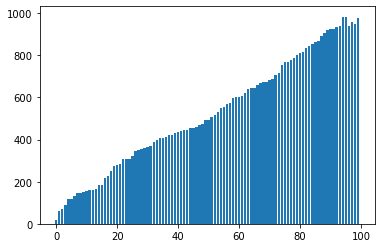

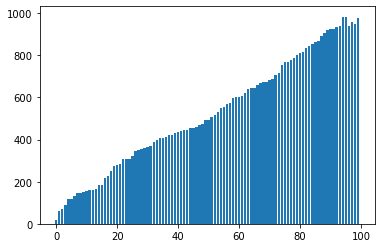

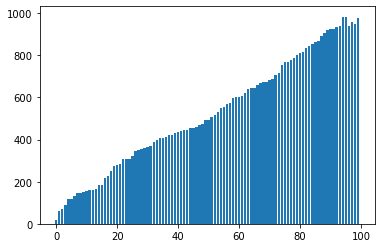

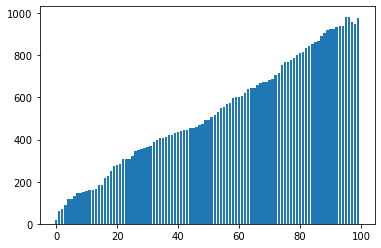

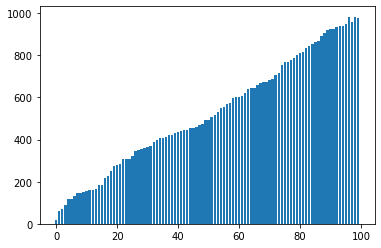

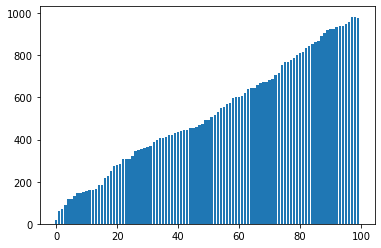

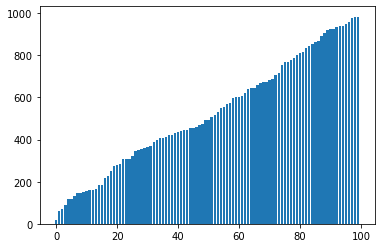

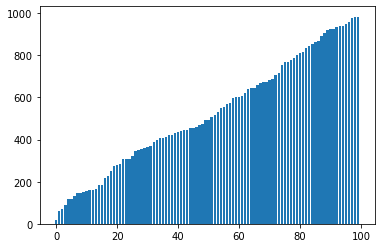

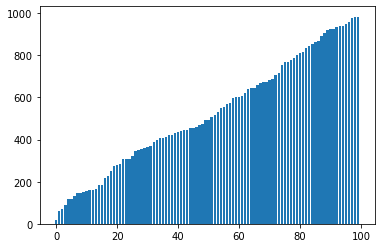

In [9]:
import random
import matplotlib.pyplot as plt
class sort:
    def __init__(self,lower_limit,upper_limit,numbers):
        self.list=random.sample(range(lower_limit, upper_limit), numbers)
        self.index=[i for i in range(len(self.list))]
#         print(self.list)
    def find_min(self,list):
        min_val=list[0]
        min_index=0
        for val in range(len(list)):
            if list[val]<min_val:
                min_val=list[val]
                min_index=val
                
        if len(self.list)>len(list):
            min_index=(len(self.list)-len(list))+min_index
        return min_index
    
    def sort_it(self):
        for val in range(len(self.list)):
            index=self.find_min(self.list[val:len(self.list)])
            self.list[index],self.list[val]=self.list[val],self.list[index]
            plt.bar(self.index,self.list)
            plt.show()
            
#         print(self.list)

                
cl=sort(0,1000,100)
cl.sort_it()

# Insertion sort

[2, 9, 8, 4, 3]
1
2


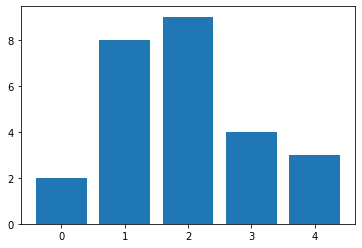

1
3


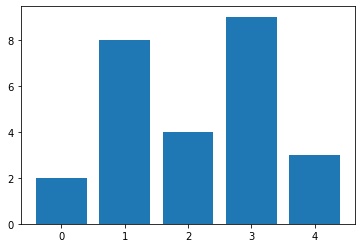

2


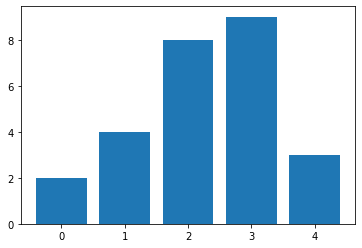

1
4


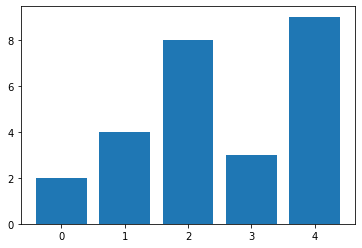

3


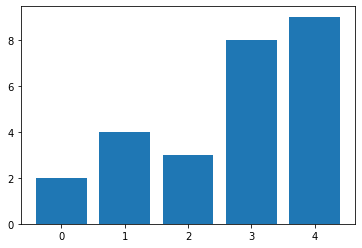

2


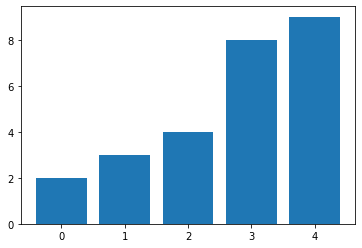

1


In [157]:
import random
import matplotlib.pyplot as plt
class i_sort:
    def __init__(self,lower_limit,upper_limit,numbers):
        self.list=random.sample(range(lower_limit, upper_limit), numbers)
        self.index=[i for i in range(len(self.list))]
        print(self.list)
        
    def swap(self,ind_1,ind_2):
        self.list[ind_1],self.list[ind_2]=self.list[ind_2],self.list[ind_1]

    def i_sort_it(self):
        for val in range(0,len(self.list)):
            for val_1 in range(val,0,-1):
                print(val_1)
                if self.list[val_1]<self.list[val_1-1]:
                    self.swap(val_1,val_1-1)
                else:
                    break
                plt.bar(self.index,self.list)
                plt.show()

cl=i_sort(0,10,5)
cl.i_sort_it()

## Shell Sort
knuth sequence
* h=(3*h)+1

In [167]:
import random
import matplotlib.pyplot as plt
class shell_sort():
    def __init__(self,lower_limit,upper_limit,numbers):
        self.list=random.sample(range(lower_limit, upper_limit), numbers)
        self.index=[i for i in range(len(self.list))]
        self.generate_series()
        print(self.list)
        
    def swap(self,ind1,ind2):
        self.list[ind1],self.list[ind2]=self.list[ind2],self.list[ind1]
    
    def generate_series(self):
        self.seq=[]
        for val in range(len(self.list)):
            digit=(3*val)+1
            if digit>len(self.list):
                break
            self.seq.append(digit)
        self.seq=self.seq[::-1]
                
    def s_sort(self):
        for seq in self.seq:
            for val in range(0,(len(self.list)//seq)*seq,seq):
                for val_1 in range(val,0,-seq):
                    if self.list[val_1]<self.list[val_1-seq]:
                        self.swap(val_1,val_1-seq)
                    else:
                        break
#                     plt.bar(self.index,self.list)
#                     plt.show()
        print(self.list)


ss=shell_sort(0,1000,50)
ss.generate_series()
ss.s_sort()

[943, 379, 194, 888, 638, 463, 491, 547, 338, 694, 131, 529, 84, 660, 245, 561, 887, 138, 850, 363, 858, 914, 557, 321, 112, 18, 137, 392, 923, 88, 635, 641, 855, 912, 474, 436, 832, 669, 380, 815, 846, 748, 216, 871, 984, 184, 352, 754, 751, 316]
[18, 84, 88, 112, 131, 137, 138, 184, 194, 216, 245, 316, 321, 338, 352, 363, 379, 380, 392, 436, 463, 474, 491, 529, 547, 557, 561, 635, 638, 641, 660, 669, 694, 748, 751, 754, 815, 832, 846, 850, 855, 858, 871, 887, 888, 912, 914, 923, 943, 984]


## Knuth sort

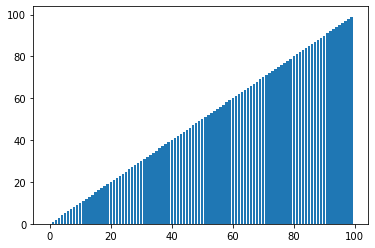

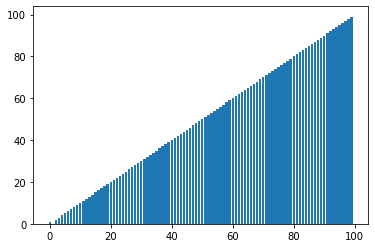

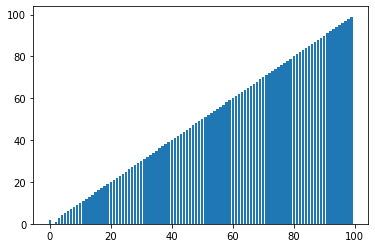

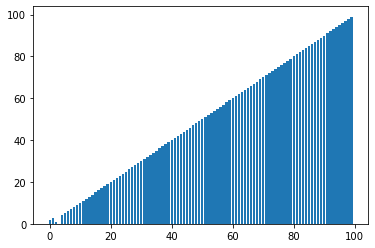

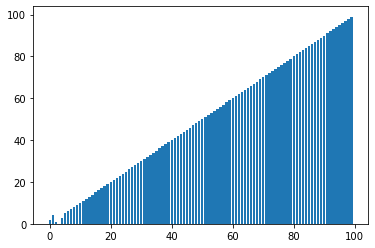

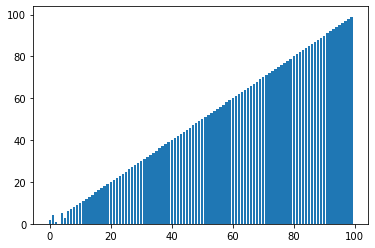

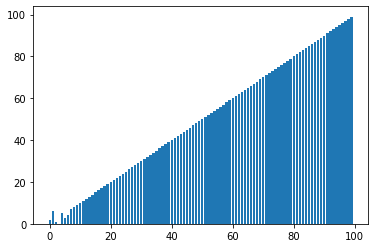

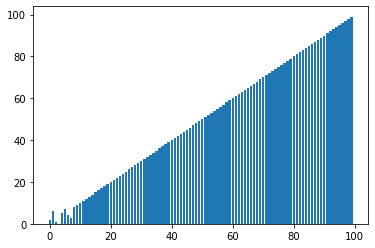

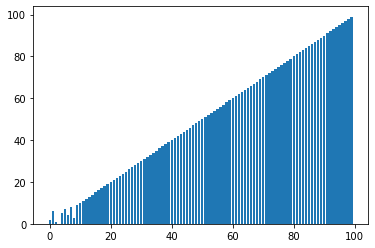

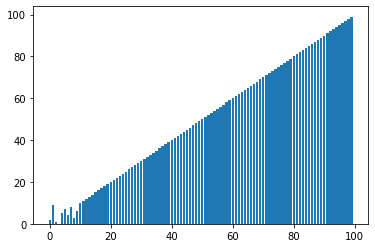

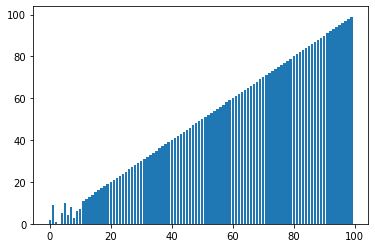

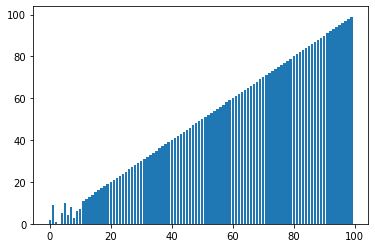

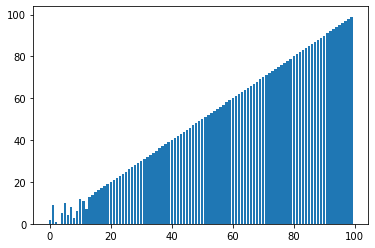

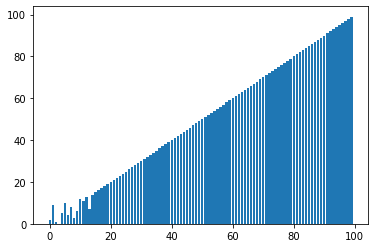

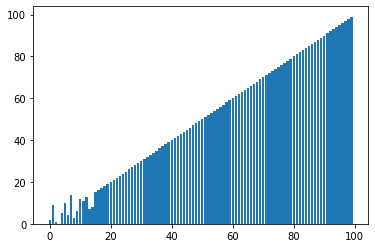

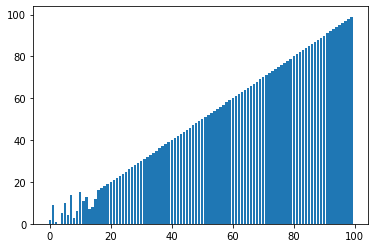

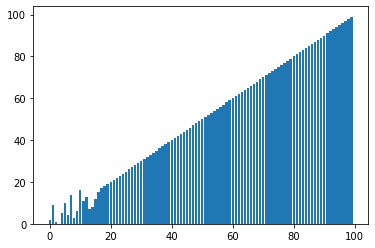

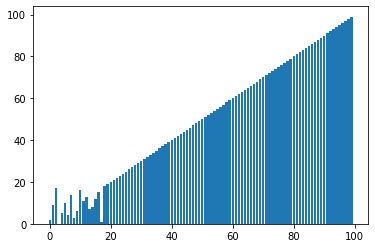

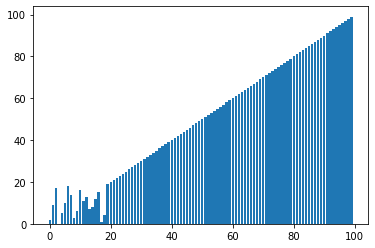

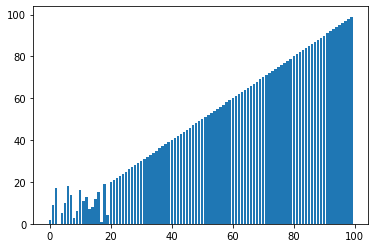

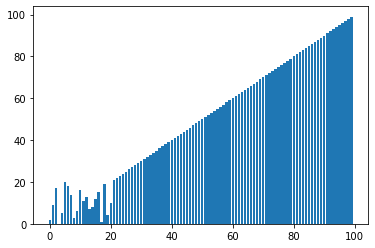

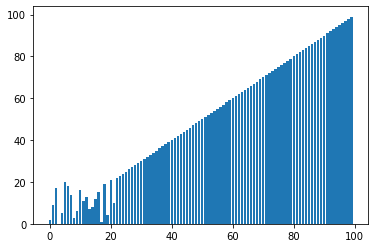

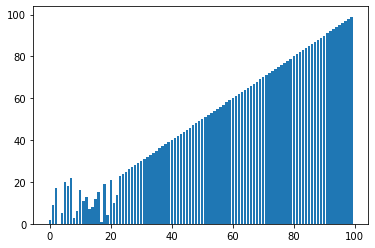

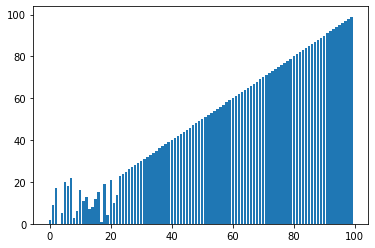

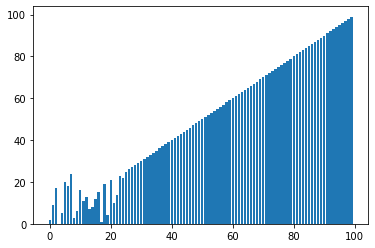

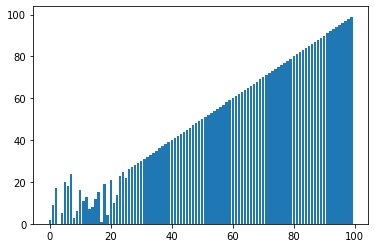

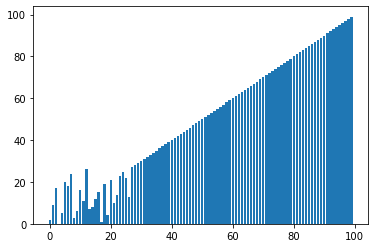

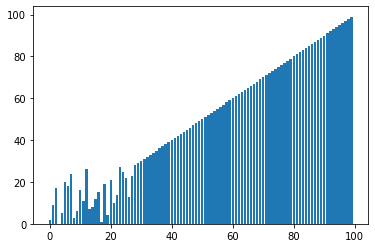

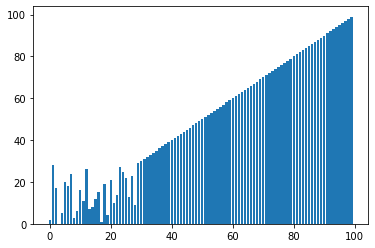

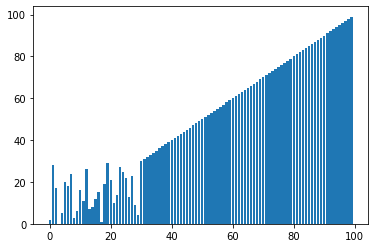

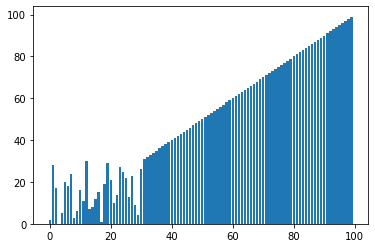

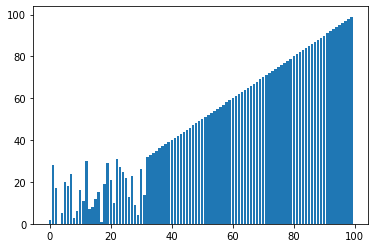

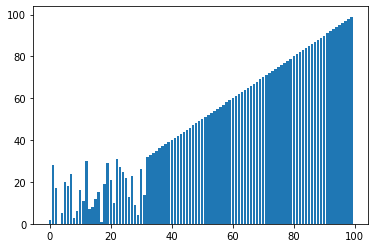

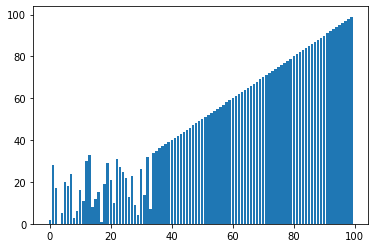

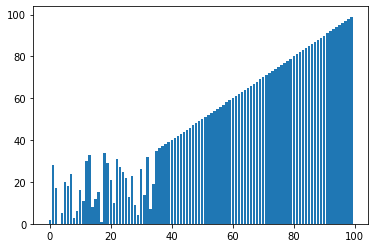

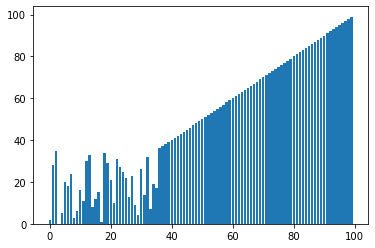

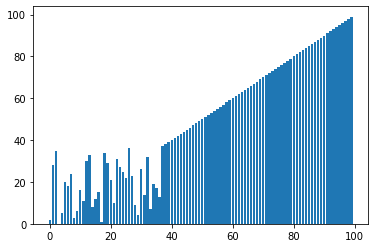

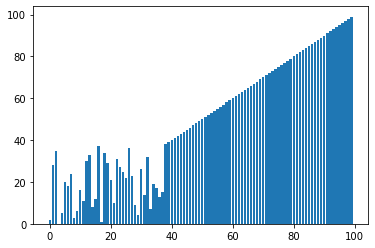

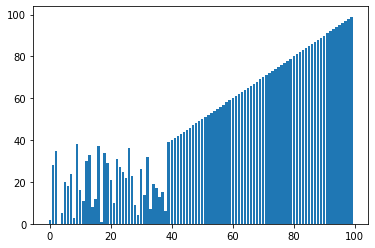

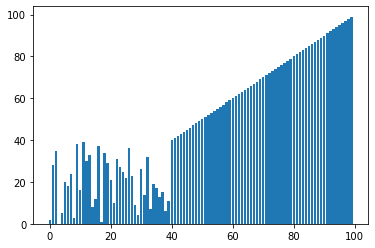

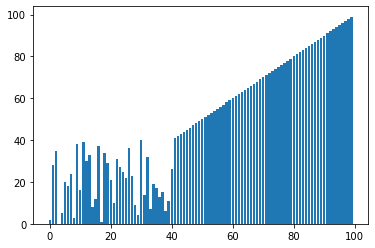

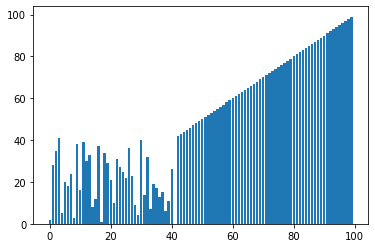

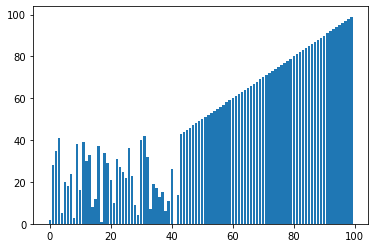

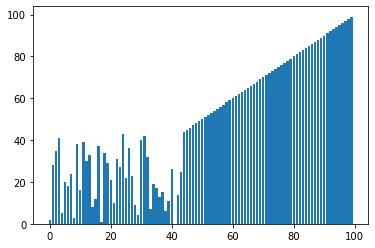

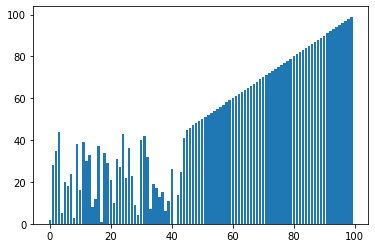

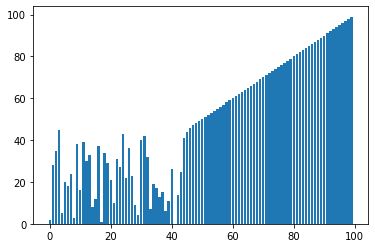

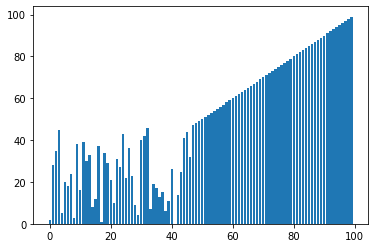

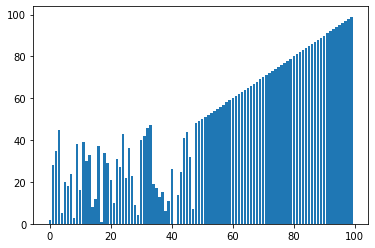

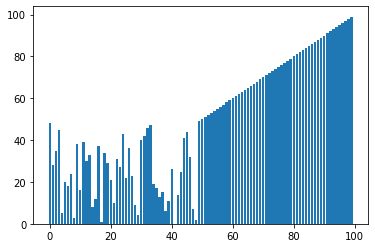

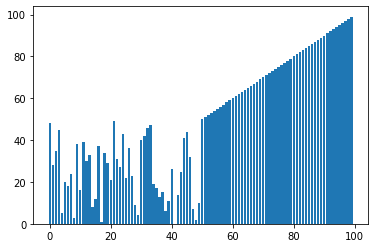

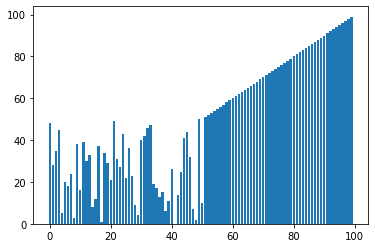

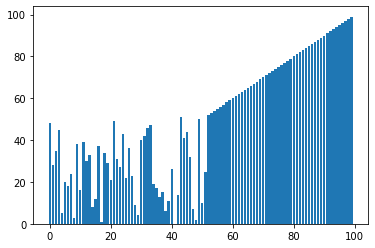

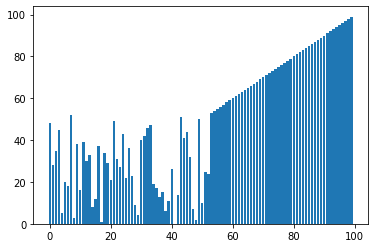

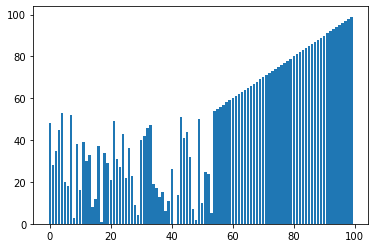

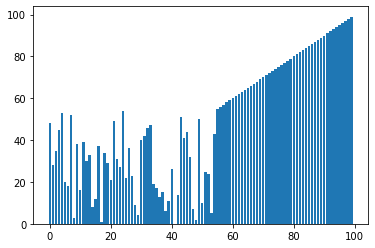

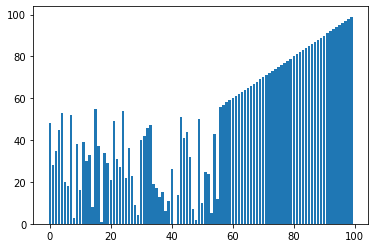

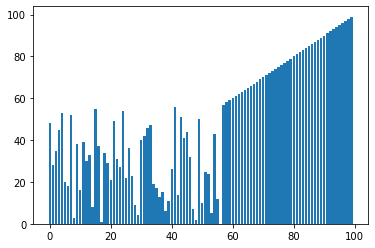

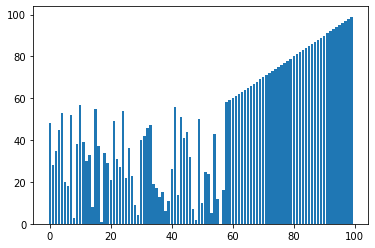

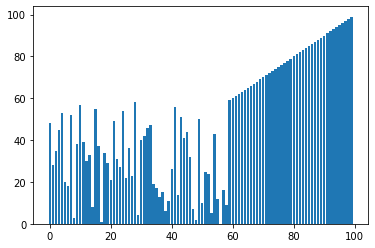

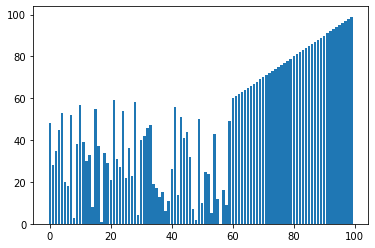

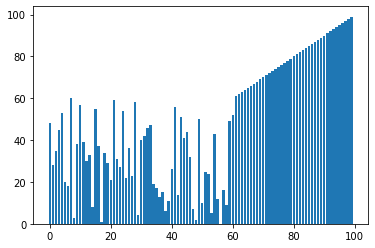

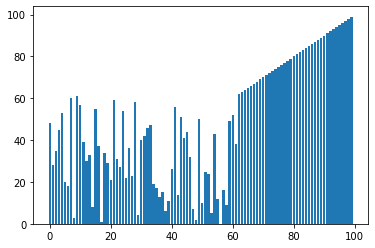

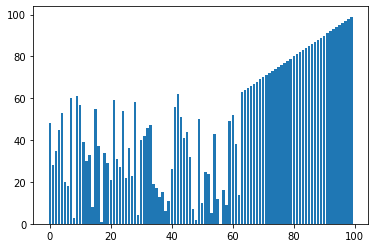

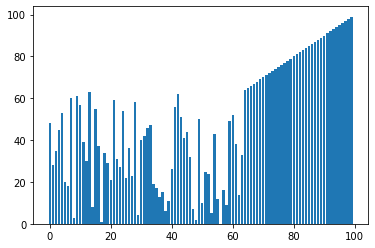

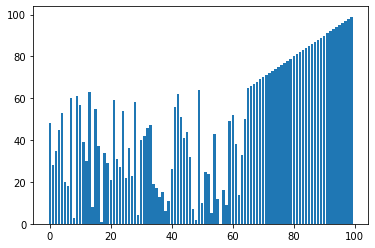

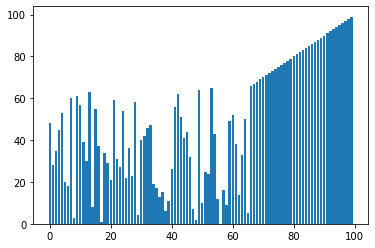

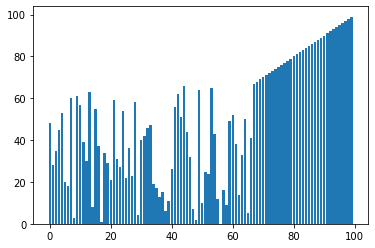

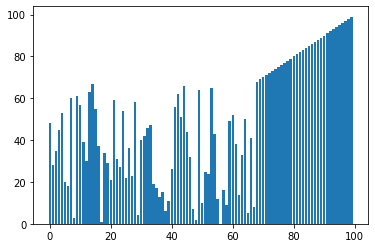

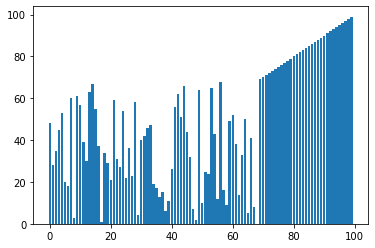

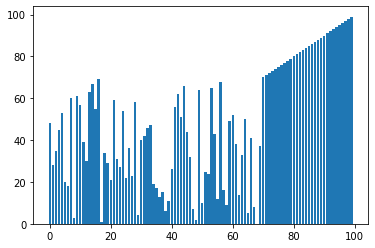

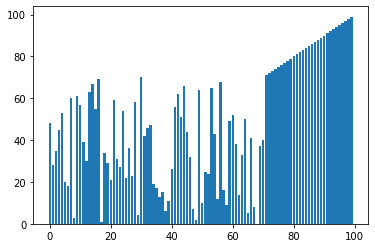

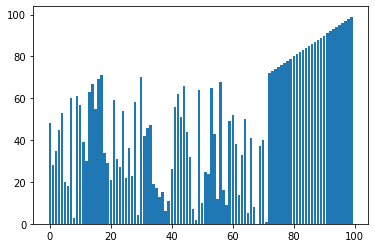

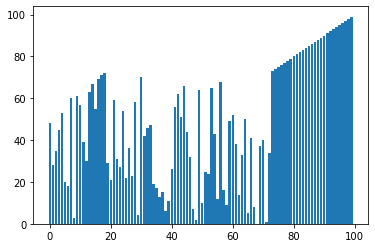

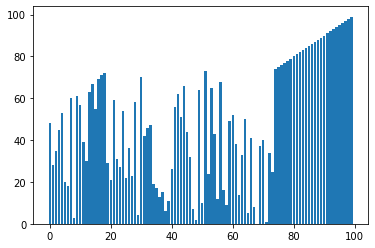

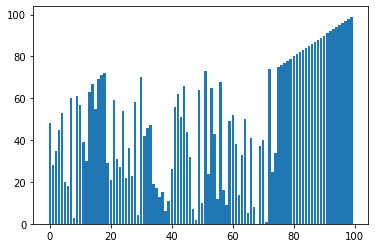

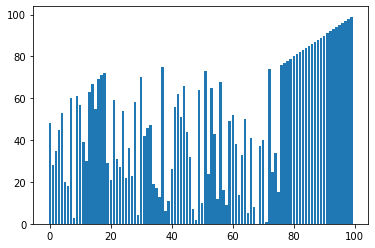

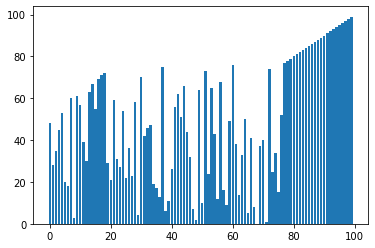

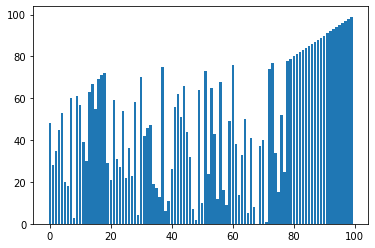

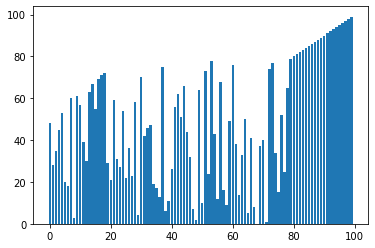

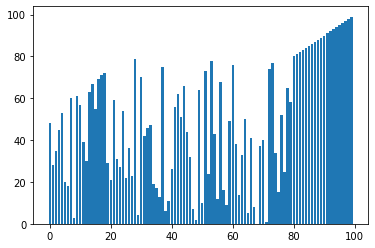

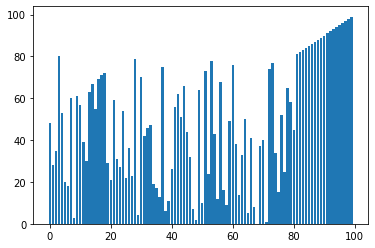

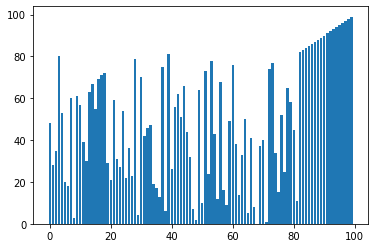

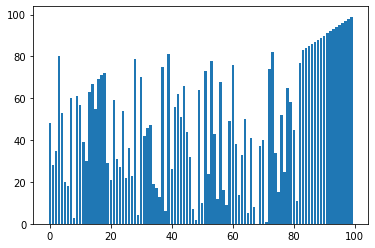

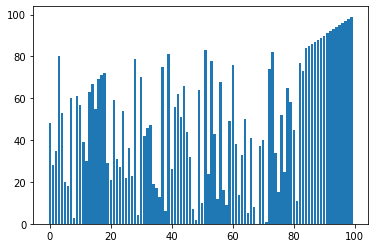

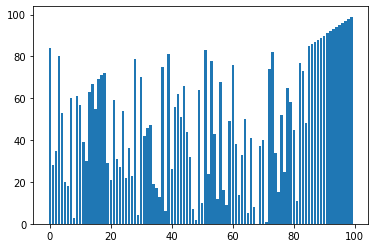

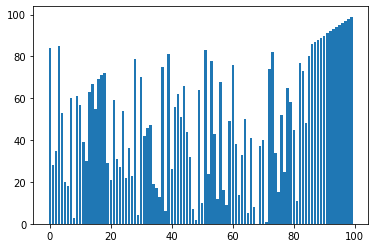

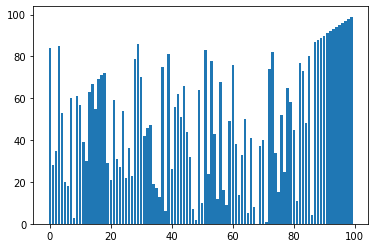

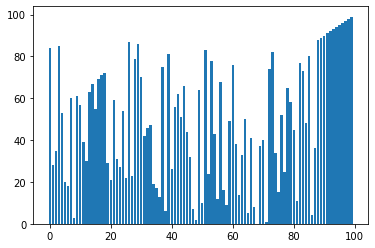

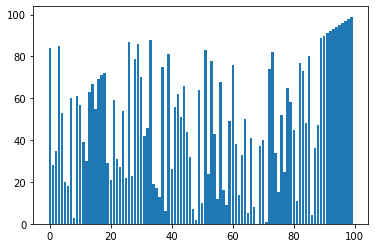

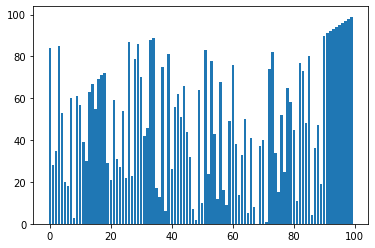

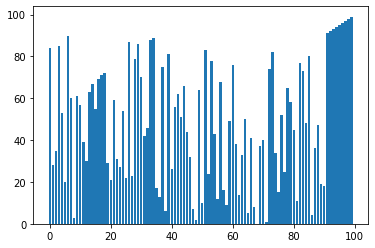

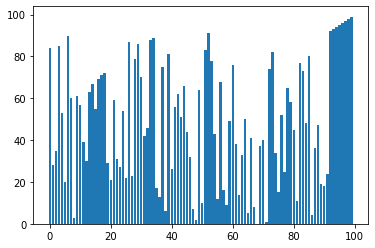

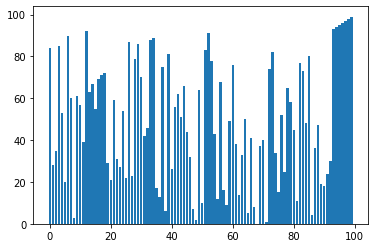

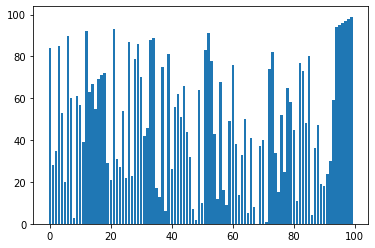

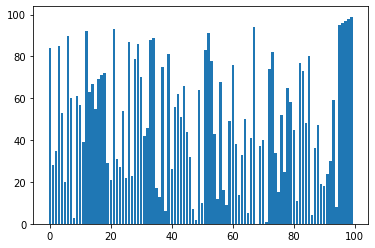

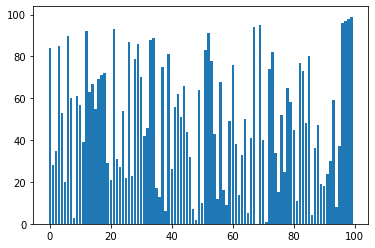

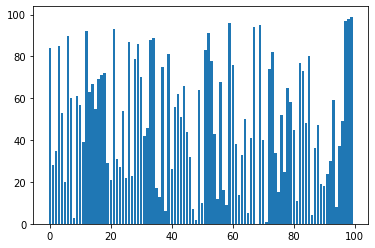

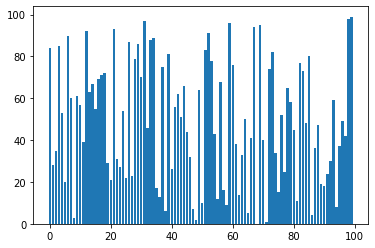

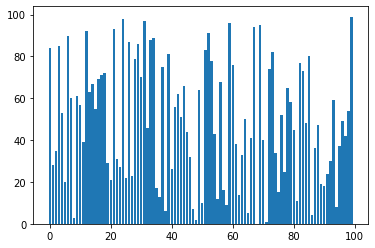

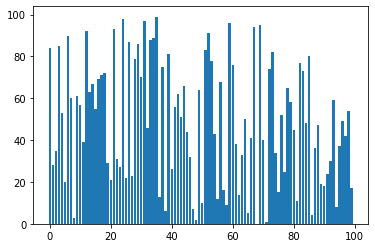

[84, 28, 35, 85, 53, 20, 90, 60, 3, 61, 57, 39, 92, 63, 67, 55, 69, 71, 72, 29, 21, 93, 31, 27, 98, 22, 87, 23, 79, 86, 70, 97, 46, 88, 89, 99, 13, 75, 6, 81, 26, 56, 62, 51, 66, 44, 32, 7, 2, 64, 10, 83, 91, 78, 43, 12, 68, 16, 9, 96, 76, 38, 14, 33, 50, 5, 41, 94, 0, 95, 40, 1, 74, 82, 34, 15, 52, 25, 65, 58, 45, 11, 77, 73, 48, 80, 4, 36, 47, 19, 18, 24, 30, 59, 8, 37, 49, 42, 54, 17]


In [175]:
import random
import matplotlib.pyplot as plt
class shuffle():
    def __init__(self,numbers):
        self.list=[i for i in range(numbers)]
        self.index=[j for j in range(numbers)]
    def swap(self,ind1,ind2):
        self.list[ind1],self.list[ind2]=self.list[ind2],self.list[ind1]
    def shuff(self):
        for val in range(len(self.list)):
            self.swap(val,random.randint(0,val))
            plt.bar(self.index,self.list)
            plt.show()
        print(self.list)


sh=shuffle(100)
sh.shuff()

## Graham Scan

X=[4, 5, 2, 3, 3, 4, 4, 3, 2.5]
Y=[1, 2, 3, 3, 4, 4, 5, 5, 4.5]


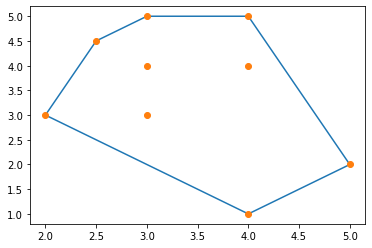

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

class grahm:
    def __init__(self):
        self.stack1=[]
        self.x=[4,5,2,3,3,4,4,3,2.5]
        self.y=[1,2,3,3,4,4,5,5,4.5]
        self.min_index=self.y.index(np.min(self.y))
        print("X="+str(self.x))
        print("Y="+str(self.y))

    def angle(self,x1,y1,x2,y2):
        angle=math.atan2((y2-y1),(x2-x1))*(180/math.pi)
        if angle<0:
            angle=180+abs(angle)
        return angle
    
    def check_rotation(self,ax,ay,bx,by,cx,cy):
        area=((bx-ax)*(cy-ay))-((by-ay)*(cx-ax))
        if area>0:
            return 1
        elif area<0:
            return -1
        else:
            return 0

    def sort(self):
        temp_angle={}
        for val in range(len(self.y)):
            try:
                temp_angle.update({val:self.angle(self.x[self.min_index],self.y[self.min_index],self.x[val],self.y[val])})
            except:
                pass
        sorted_index=sorted(temp_angle, key=temp_angle.get)[0:len(self.y)]
        sorted_angles=sorted(temp_angle.values())[0:len(self.y)]
        return sorted_index,sorted_angles

    def plot(self,array):
        self.newx=[]
        self.newy=[]
        for val in array:
            self.newx.append(self.x[val])
            self.newy.append(self.y[val])
        self.newx.append(self.x[0])
        self.newy.append(self.y[0])
        plt.plot(self.newx,self.newy)
        plt.plot(self.x,self.y,'o')
        plt.show()

    def main(self):
        sorted_index,sorted_angles=self.sort()
#         print(sorted_angles)
#         print(sorted_index)
        self.stack1.append(sorted_index[0])
        temp=1
        while self.stack1[-1]!=sorted_index[-1]:
            if len(self.stack1)>=3:
                ax=self.x[self.stack1[-3]]
                ay=self.y[self.stack1[-3]]
                bx=self.x[self.stack1[-2]]
                by=self.y[self.stack1[-2]]
                cx=self.x[self.stack1[-1]]
                cy=self.y[self.stack1[-1]]
                if self.check_rotation(ax,ay,bx,by,cx,cy)==1:
                    self.stack1.append(sorted_index[temp])
                elif self.check_rotation(ax,ay,bx,by,cx,cy)==-1:
                    del self.stack1[-2]
                    self.stack1.append(sorted_index[temp])
                elif self.check_rotation(ax,ay,bx,by,cx,cy)==0:
                    del self.stack1[-2]
                    self.stack1.append(sorted_index[temp])   
            else:
                self.stack1.append(sorted_index[temp])
            temp+=1

        ax=self.x[self.stack1[-3]]
        ay=self.y[self.stack1[-3]]
        bx=self.x[self.stack1[-2]]
        by=self.y[self.stack1[-2]]
        cx=self.x[self.stack1[-1]]
        cy=self.y[self.stack1[-1]]
        if self.check_rotation(ax,ay,bx,by,cx,cy)==1:
            self.stack1.append(sorted_index[temp])
        elif self.check_rotation(ax,ay,bx,by,cx,cy)==-1:
            del self.stack1[-2]
        elif self.check_rotation(ax,ay,bx,by,cx,cy)==0:
            pass
        self.plot(self.stack1)

gr=grahm()
gr.main()